# Refitting Literature Relations: $M_{\rm{tot}}$-$\lambda$

This section of the project fits scaling relations to literature datasets, in order to compare previous work to our results.

Here we focus on scaling relations between the total mass of galaxy clusters and groups ($M_{\rm{tot}}$, or $M^{\rm{tot}}_{\Delta}$ within an overdensity radius $R_{\Delta}$) and the cluster/group richness ($\lambda$; a probabilistic measure of the number of galaxies in a cluster/group). We may also refer to $M_{\rm{tot}}$ as $M_{\rm{hy}}$ or $M_{\rm{WL}}$, for hydrostatic mass and weak-lensing mass respectively. Both ostensibly refer to the total halo mass, but are both affected by different physical and practical considerations.

Relation fits are performed using the XGA interface to the R scaling-relation fitting package LIRA, see the paper for full details. This notebook uses data from the following:
* [Andreon et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..23A/abstract) - An analysis of a sample of 23 massive clusters between $0.15<z<0.55$ - all with uniformly measured weak-lensing-mass and richness values.
* [Kiiveri et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021MNRAS.502.1494K/abstract) - An analysis of the CODEX sample of galaxy clusters (between $0.35<z<0.65$), with 25 individually constrained (as opposed to stacked) weak lensing masses.

## Import Statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import andreon_cosmo, kiiveri_cosmo, rich_norm, m_norm

import xga
from xga.relations.fit import scaling_relation_lira

## Normalisation values

These are used when fitting the scaling relations to normalise the data, and are kept the same throughout this entire project:

In [2]:
rich_norm

<Quantity 100.>

In [3]:
m_norm

<Quantity 1.e+14 solMass>

## Cosmological models

These are used to calculated the Hubble parameter values applied to some scaling relation parameters - we match the models used by the original analyses, as they will have had effects on the measured property values we are using (small in all likelihood, but still):

### Andreon et al. (2014)

In [4]:
andreon_cosmo

LambdaCDM(name=None, H0=<Quantity 70. km / (Mpc s)>, Om0=0.3, Ode0=0.7, Tcmb0=<Quantity 0. K>, Neff=3.04, m_nu=None, Ob0=None)

### Kiiveri et al. (2021)

In [5]:
kiiveri_cosmo

LambdaCDM(name=None, H0=<Quantity 70. km / (Mpc s)>, Om0=0.27, Ode0=0.73, Tcmb0=<Quantity 0. K>, Neff=3.04, m_nu=None, Ob0=None)

## Loading data files

All datasets to be refit are included in this repository, so we can load in the required data here.

## Andreon et al. (2014)

Important considerations for this dataset:
* The masses and richnesses were measured within a fixed 500 kpc aperture.

In [6]:
andreon_samp = pd.read_csv("../../sample_files/andreon2014.csv")
andreon_samp.head(6)

,Name,z,log10n0.5,log10n0.5_err,log10M0.5,log10M0.5_err
0,Abell2104,0.15,1.44,0.08,14.53,0.06
1,Abell1914,0.17,1.72,0.06,14.54,0.05
2,MS0440.5+0204,0.19,1.29,0.09,14.40,0.09
3,Abell520,0.20,1.42,0.08,14.53,0.06
4,Abell2163,0.20,1.49,0.07,14.62,0.06
5,Abell223N,0.21,1.43,0.08,14.48,0.07


In [7]:
andreon_samp.columns

Index(['Name', 'z', 'log10n0.5', 'log10n0.5_err', 'log10M0.5',
       'log10M0.5_err'],
      dtype='object')

Calculating E(z) values for these clusters, *though we shouldn't need them*:

In [8]:
andreon_samp['E'] = andreon_cosmo.efunc(andreon_samp['z'].values)

### Kiiveri et al. (2021)

Important considerations for this dataset:
* The richnesses were measured with redMaPPer both from SDSS and CFHT imaging - redMaPPer richnesses don't have an associated measurement radius in the same way as other measurements used in this project.
* Masses in this dataset were measured within $R_{200}$.
* We remove one entry with very large fractional richness error - CODEX ID of 24877.

In [9]:
kiiveri_samp = pd.read_csv("../../sample_files/kiiveri2021.csv")
# Add a name column
kiiveri_samp['codex_name'] = kiiveri_samp['codex_id'].apply(lambda x: 'CODEX-'+str(x))
kiiveri_samp.head(6)

,codex_id,spiders_id,ra_opt,dec_opt,ra_xray,dec_xray,filters,spec_z,sdss_rm_z,sdss_rm_richness,...,cfht_rm_z,cfht_rm_richness,cfht_rm_richness_err,m200,m200_err+,m200_err-,m200_errsys,lx,lx_err,codex_name
0,16566,1_2639,08:42:31,47:49:19,08:42:28,47:50:03,ugriz,0.382,0.368,108,...,0.383,120,3,14.61,0.20,0.29,0.02,3.1,1.2,CODEX-16566
1,24865,1_5729,08:22:42,41:27:30,08:22:45,41:28:09,ugriz,0.486,0.477,138,...,0.487,91,3,14.91,0.19,0.27,0.03,4.9,1.7,CODEX-24865
2,24872,1_5735,08:26:06,40:17:31,08:25:59,40:15:19,ugriz,0.402,0.391,149,...,0.407,116,4,14.76,0.23,0.35,0.02,5.4,1.3,CODEX-24872
3,24877,1_5740,08:24:27,40:06:19,08:24:40,40:06:53,ugriz,0.592,0.539,63,...,0.593,71,4,15.28,0.18,0.24,0.03,4.9,2.0,CODEX-24877
4,24981,1_5830,08:56:13,37:56:16,08:56:14,37:55:52,ugriz,0.411,0.411,123,...,0.407,107,3,14.68,0.23,0.34,0.02,7.6,1.9,CODEX-24981
5,25424,1_6220,11:30:56,38:25:10,11:31:01,38:24:42,ugriz,0.509,0.513,65,...,0.510,69,3,14.51,0.23,0.35,0.02,5.5,2.1,CODEX-25424


Removing a dataset entry because of very large richness fractional uncertainty.

In [10]:
kiiveri_samp = kiiveri_samp[kiiveri_samp['codex_id'] != 24877]

In [11]:
kiiveri_samp.columns

Index(['codex_id', 'spiders_id', 'ra_opt', 'dec_opt', 'ra_xray', 'dec_xray',
       'filters', 'spec_z', 'sdss_rm_z', 'sdss_rm_richness',
       'sdss_rm_richness_err', 'cfht_rm_z', 'cfht_rm_richness',
       'cfht_rm_richness_err', 'm200', 'm200_err+', 'm200_err-', 'm200_errsys',
       'lx', 'lx_err', 'codex_name'],
      dtype='object')

Calculating E(z) values for these clusters, *though we shouldn't need them*:

In [12]:
kiiveri_samp['E'] = kiiveri_cosmo.efunc(kiiveri_samp['spec_z'].values)

## Fitting scaling relations

### Andreon et al. (2014)

#### $M^{\rm{tot}}_{500\rm{kpc}}$-$\lambda_{500\rm{kpc}}$

In [13]:
# Setting up property variables in astropy quantity objects
and_m_vals = 10**andreon_samp['log10M0.5']
and_m_errs = andreon_samp['log10M0.5_err']/np.log(10)*and_m_vals
and_mtot500kpc = Quantity([and_m_vals, and_m_errs, and_m_errs], 'Msun').T

and_rich_vals = 10**andreon_samp['log10n0.5']
and_rich_errs = andreon_samp['log10n0.5_err']*np.log(10)*and_rich_vals
and_rich500kpc = Quantity([and_rich_vals, and_rich_errs, and_rich_errs], '').T

and_mtot500kpc_rich500kpc = scaling_relation_lira(and_mtot500kpc[:, 0], and_mtot500kpc[:, 1:], and_rich500kpc[:, 0], 
                                                  and_rich500kpc[:, 1:], m_norm, rich_norm, 
                                                  y_name=r"$M^{\rm{tot}}_{\rm{500kpc}}$", 
                                                  x_name=r"$\lambda_{\rm{500kpc}}$", 
                                                  point_names=andreon_samp['Name'].values)
and_mtot500kpc_rich500kpc.model_colour = 'lightcoral'
and_mtot500kpc_rich500kpc.author = 'Andreon et al.'
and_mtot500kpc_rich500kpc.name = r'Andreon et al. $M^{\rm{tot}}_{\rm{500kpc}}$-$\lambda_{\rm{500kpc}}$'
and_mtot500kpc_rich500kpc.save("../../outputs/scaling_relations/literature_refits/mtot-richness"\
                               "/andreon2014_mtot500kpc_rich500kpc.xgarel")

R[write to console]: module mix loaded



  |**************************************************| 100%


In [14]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=and_mtot500kpc_rich500kpc.pars[0][0], e=and_mtot500kpc_rich500kpc.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=and_mtot500kpc_rich500kpc.pars[1][0], e=and_mtot500kpc_rich500kpc.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=and_mtot500kpc_rich500kpc.scatter_par[0], e=and_mtot500kpc_rich500kpc.scatter_par[1]))

Slope of 0.718 ± 0.170

Normalisation of 7.573 ± 1.248

Scatter of 0.060 ± 0.018


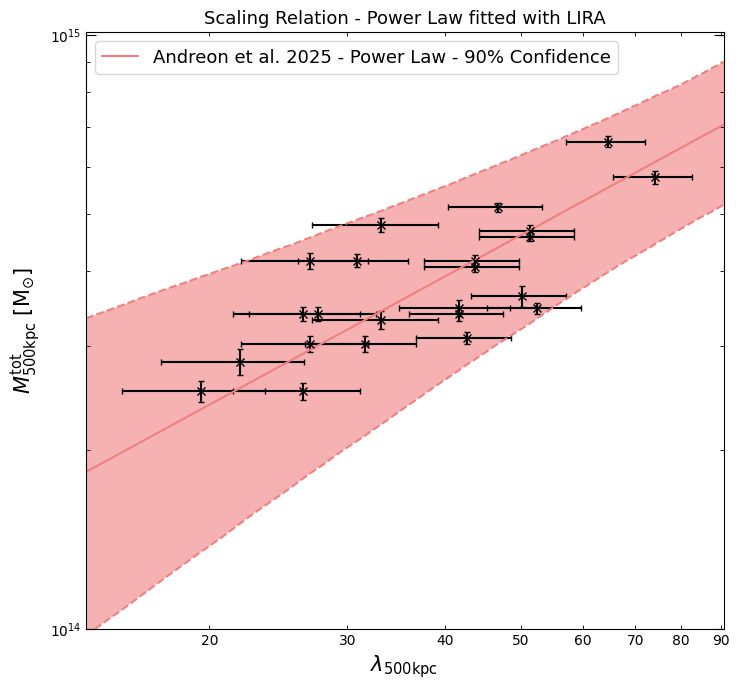

In [15]:
and_mtot500kpc_rich500kpc.view(figsize=(7.5, 7), y_lims=Quantity([1e+14, 1.01e+15], 'Msun'))

### Kiiveri et al. (2021)

#### $M^{\rm{tot}}_{200}$-$\lambda_{\rm{SDSS}}$

In [16]:
# Setting up property variables in astropy quantity objects
kii_m_vals = 10**kiiveri_samp['m200'].values
kii_m_errs = kiiveri_samp[['m200_err-', 'm200_err+']].values/np.log(10)*kii_m_vals[..., None]
kii_mtot200 = Quantity([kii_m_vals, kii_m_errs[:, 0], kii_m_errs[:, 1]], 'Msun').T

kii_sdssrich = Quantity(kiiveri_samp[['sdss_rm_richness', 'sdss_rm_richness_err', 'sdss_rm_richness_err']], '')

kii_mtot200_sdssrich = scaling_relation_lira(kii_mtot200[:, 0], kii_mtot200[:, 1:], kii_sdssrich[:, 0], kii_sdssrich[:, 1:], 
                                             m_norm, rich_norm, y_name=r"$M^{\rm{tot}}_{200}$", 
                                             x_name=r"$\lambda_{\rm{SDSS}}$", 
                                             point_names=kiiveri_samp['codex_name'].values)
kii_mtot200_sdssrich.model_colour = 'darkred'
kii_mtot200_sdssrich.author = 'Kiiveri et al.'
kii_mtot200_sdssrich.name = r'Kiiveri et al. $M^{\rm{tot}}_{200}$-$\lambda_{\rm{SDSS}}$'
kii_mtot200_sdssrich.save("../../outputs/scaling_relations/literature_refits/mtot-richness/kiiveri2021_mtot200_sdssrich.xgarel")

  |**************************************************| 100%


In [17]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=kii_mtot200_sdssrich.pars[0][0], e=kii_mtot200_sdssrich.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}\n".format(v=kii_mtot200_sdssrich.pars[1][0], e=kii_mtot200_sdssrich.pars[1][1]))
print("Scatter of {v:.3f} ± {e:.3f}".format(v=kii_mtot200_sdssrich.scatter_par[0], e=kii_mtot200_sdssrich.scatter_par[1]))

Slope of 1.968 ± 1.441

Normalisation of 4.485 ± 1.279

Scatter of 0.169 ± 0.059


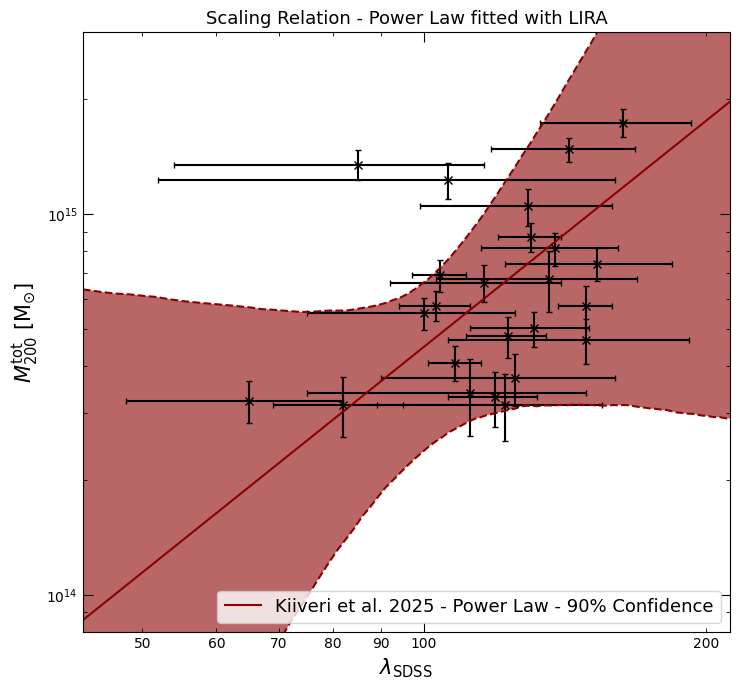

In [18]:
kii_mtot200_sdssrich.view(figsize=(7.5, 7), y_lims=Quantity([8e+13, 3e+15], 'Msun'))

#### Combined contours

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/products/relation.py:1243: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  warn('Not all of these ScalingRelations have the same x-axis names.')
/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/products/relation.py:1250: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  warn('Not all of these ScalingRelations have the same y-axis names.')


Removed no burn in
Removed no burn in


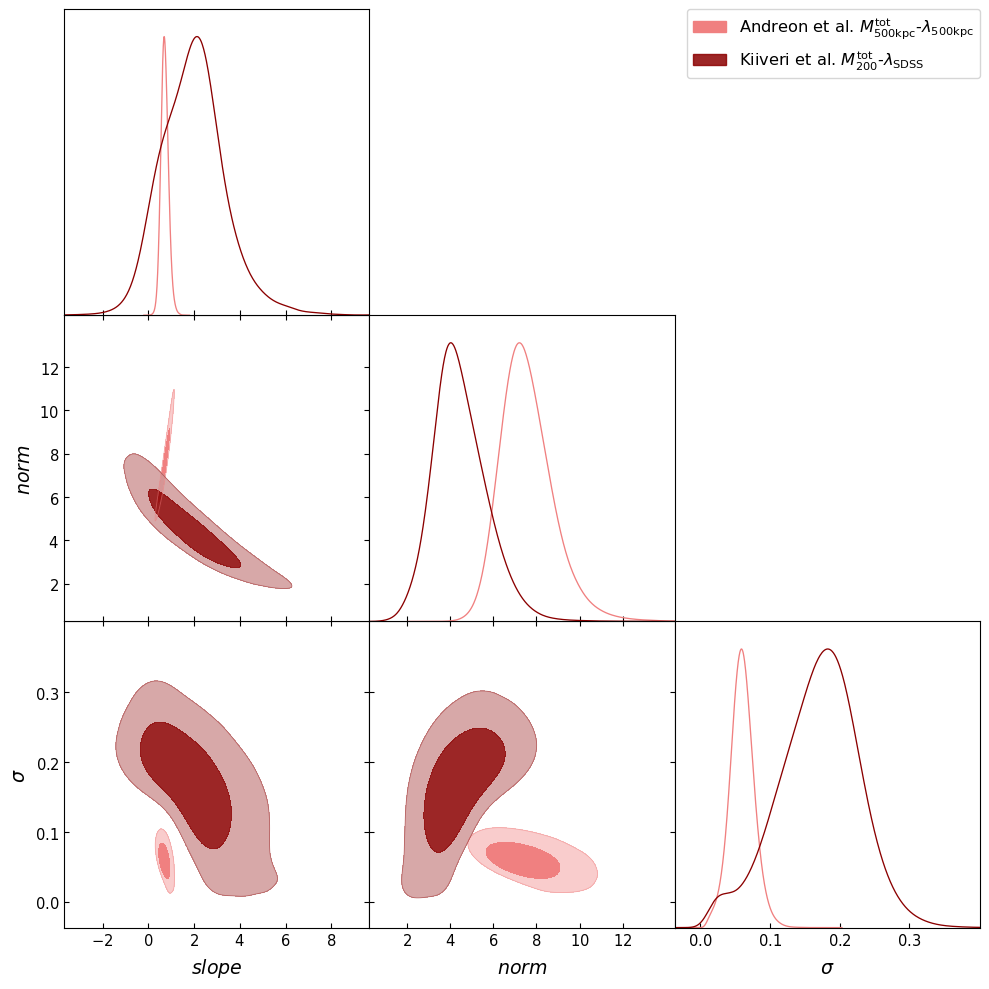

In [19]:
(and_mtot500kpc_rich500kpc + kii_mtot200_sdssrich).view_corner()